## Patrick Zwierzynski ##
#### Movie Poster General Stats ####
------
This jupyter notebook contains some initial, general introductory descriptions and statistics about the movie poster data set.

In [98]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mp_img
import re as regex
import seaborn as sns

from PIL import Image
import requests
from io import BytesIO

from collections import defaultdict

In [8]:
# Import the raw csv data
movie_importDF_nd = pd.read_csv('Data\MovieGenre.csv').dropna()
col_names = movie_importDF_nd.keys()
N, D = movie_importDF_nd.shape

# Show the column titles
print(col_names)

Index(['imdbId', 'Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster'], dtype='object')


In [9]:
# Show ID no., Title, and Genres of first 10 entries in data set
movie_importDF_nd[:10][["imdbId", "Title", "Genre"]]

,imdbId,Title,Genre
0,114709,Toy Story (1995),Animation|Adventure|Comedy
1,113497,Jumanji (1995),Action|Adventure|Family
2,113228,Grumpier Old Men (1995),Comedy|Romance
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance
5,113277,Heat (1995),Action|Crime|Drama
6,114319,Sabrina (1995),Comedy|Drama
7,112302,Tom and Huck (1995),Adventure|Comedy|Drama
8,114576,Sudden Death (1995),Action|Crime|Thriller
9,113189,GoldenEye (1995),Action|Adventure|Thriller


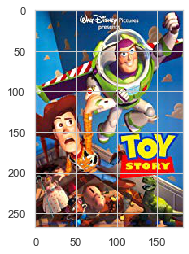

In [101]:
# Display the movie poster of the first entry
poster_link = movie_importDF_nd[:1]["Poster"][0]

# Access image data from URL
response = requests.get(poster_link)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.show()

In [103]:
# Extract raw genre data
genre_raw_n = movie_importDF_nd['Genre'].to_numpy()
genre_dict = defaultdict(int)
count_dict = defaultdict(int)

for genre_str in genre_raw_n:
    genres = regex.split("\|", genre_str)
    count_dict[len(genres)] += 1
    for genre in genres:
        genre_dict[genre] += 1 
        
genre_set = np.array(list(genre_dict.keys()))

# Display all unique genres in data set
print("%d Different Genres:\n" % genre_set.size, genre_set)

28 Different Genres:
 ['Animation' 'Adventure' 'Comedy' 'Action' 'Family' 'Romance' 'Drama'
 'Crime' 'Thriller' 'Fantasy' 'Horror' 'Biography' 'History' 'Mystery'
 'Sci-Fi' 'War' 'Sport' 'Music' 'Documentary' 'Musical' 'Western' 'Short'
 'Film-Noir' 'Talk-Show' 'News' 'Adult' 'Reality-TV' 'Game-Show']


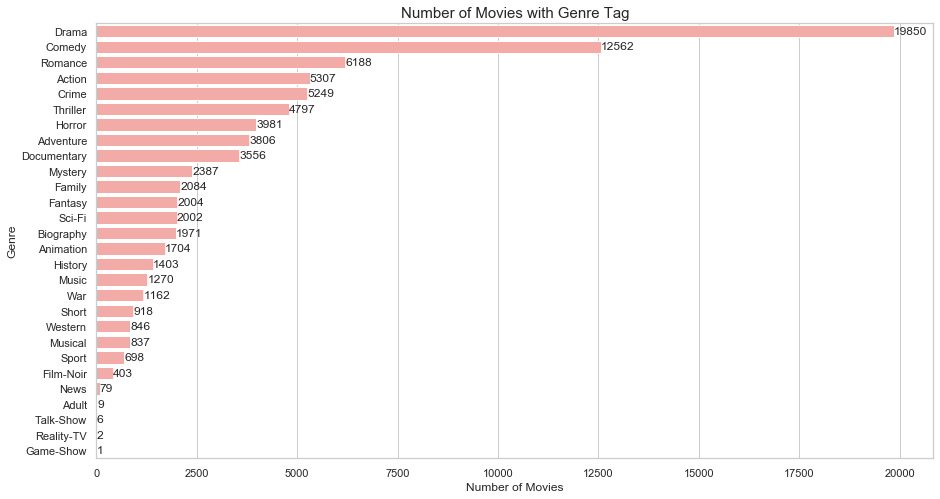

In [116]:
### PROCESS HOW MANY MOVIES IN EACH GENRE ###
# Format the plot
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
plt.figure(figsize=(15,8))
plt.title("Number of Movies with Genre Tag", fontsize=15)

# Plot the counts of different genres
genre_bar_data_df = pd.DataFrame(list(genre_dict.items()), columns=["Genre", "Number of Movies"])
genre_bar_data_df = genre_bar_data_df.sort_values("Number of Movies", ascending=False)
ax = sns.barplot(x="Number of Movies", y="Genre", data=genre_bar_data_df, color="r")

# Add the count labels
for bar, label in zip(ax.patches, genre_bar_data_df.iloc[:,1].values):
    height = bar.get_height()
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + height/2, label, ha="left", va="center")

plt.show()

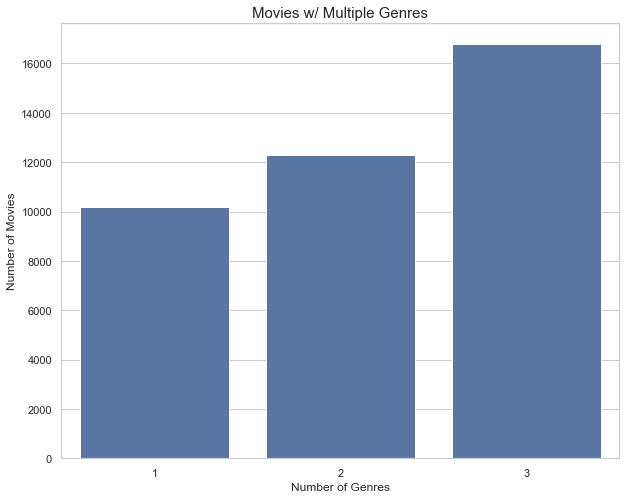

In [118]:
### PROCESS NUMBER OF GENRES FOR EACH MOVIE ###
#Format the plot
sns.set(style="whitegrid")
sns.set_color_codes("deep")
plt.figure(figsize=(10,8))
plt.title("Movies w/ Multiple Genres", fontsize=15)

# Plot the counts of different genres
count_bar_data_df = pd.DataFrame(list(count_dict.items()), columns=["Number of Genres", "Number of Movies"])
count_bar_data_df = count_bar_data_df.sort_values("Number of Movies", ascending=False)
ax = sns.barplot(x="Number of Genres", y="Number of Movies", data=count_bar_data_df, color="b")

# Add the count labels
for bar, label in zip(ax.patches, count_bar_data_df.iloc[:,1].values):
    height = bar.get_height()
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, height + 5, label, ha="left", va="center")

plt.show()